## John Luis Magtoto
CMSC 197: Naive Bayes Spam Filter
Github Link: https://github.com/JohnLuis07/CMSC-197

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import email

import os
import re

## Preprocessing

In [309]:
#dataframe = pd.DataFrame(columns = ['folder', 'file', ]

labels_dataframe = pd.read_csv("trec06p-cs280/labels", sep=" ", header=None)

labels_dataframe.columns = ["Classification", "FileLocation"]

labels_dataframe["Classification"] = labels_dataframe["Classification"].map({"spam": 1, "ham": 0})

labels_dataframe["FileLocation"] = labels_dataframe["FileLocation"].map(lambda x: x.replace("../data/", ""))

labels_dataframe.head()

,Classification,FileLocation
0,0,000/000
1,1,000/001
2,1,000/002
3,0,000/003
4,1,000/004


In [311]:
# folder location
FolderLocation = "trec06p-cs280/data"


with open('stop_words.txt', 'r') as f:
    stop_words = set(f.read().splitlines())


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)  # Join back into a single string

# Initialize DataFrame to store results
df = pd.DataFrame(columns=["Folder", "File", "EmailMessages", "Classification"])

folders = sorted(os.listdir(FolderLocation))
print("Folders found in the directory:")
    
for folder in folders:
    folder_path = os.path.join(FolderLocation, folder)
        
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        print(f"\nProcessing folder: {folder}")
        files = sorted(os.listdir(folder_path))  # Get the files inside the folder
            
        for file in files:
            file_path = os.path.join(folder_path, file)
                
            # Read and process each email file
            with open(file_path, "r", encoding="ISO-8859-1") as email_file:
                read_email_file = email_file.read()
                parsed = email.message_from_string(read_email_file)  # Parse email

                # Function to get the email message from the parsed email
                def getMessage(parsed_email):
                    if parsed_email.is_multipart():
                        return ''.join(part.get_payload(decode=True).decode('ISO-8859-1') 
                                        for part in parsed_email.walk() 
                                        if part.get_content_type() == 'text/plain')
                    else:
                        return parsed_email.get_payload(decode=True).decode('ISO-8859-1')

                # Get the email message
                msg = getMessage(parsed)
                msg = clean_text(msg)  # Clean the message text

                # Get the classification of the email based on the labels DataFrame
                # Ensure the file path matches the format in dfLabels
                labels_classification = labels_dataframe[labels_dataframe['FileLocation'] == f"{folder}/{file}"]['Classification']

                # Check if we found a classification
                if not labels_classification.empty:
                    labels_classification = labels_classification.values[0]
                else:
                    labels_classification = None  # Default value if not found

                # Concatenate the data to the main DataFrame
                df = pd.concat([df, pd.DataFrame([[folder, file, msg, labels_classification]], 
                                                    columns=["Folder", "File", "EmailMessages", "Classification"])], 
                                ignore_index=True)


Folders found in the directory:

Processing folder: 000

Processing folder: 001

Processing folder: 002

Processing folder: 003

Processing folder: 004

Processing folder: 005

Processing folder: 006

Processing folder: 007

Processing folder: 008

Processing folder: 009

Processing folder: 010

Processing folder: 011

Processing folder: 012

Processing folder: 013

Processing folder: 014

Processing folder: 015

Processing folder: 016

Processing folder: 017

Processing folder: 018

Processing folder: 019

Processing folder: 020

Processing folder: 021

Processing folder: 022

Processing folder: 023

Processing folder: 024

Processing folder: 025

Processing folder: 026

Processing folder: 027

Processing folder: 028

Processing folder: 029

Processing folder: 030

Processing folder: 031

Processing folder: 032

Processing folder: 033

Processing folder: 034

Processing folder: 035

Processing folder: 036

Processing folder: 037

Processing folder: 038

Processing folder: 039

Process

In [313]:
df

,Folder,File,EmailMessages,Classification
0,000,000,mailing list queried weeks ago running set arc...,0
1,000,001,luxury watches buy rolex rolex cartier bvlgari...,1
2,000,002,academic qualifications prestigious nonacc red...,1
3,000,003,greetings verify subscription planfans list ch...,0
4,000,004,chauncey conferred luscious continued tonsillitis,1
...,...,...,...,...
37817,126,017,great news expec ted infinex ventures infx pri...,1
37818,126,018,oil sector going crazy weekly gift kkpt thing ...,1
37819,126,019,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,126,020,prosperous future increased money earning powe...,1


In [315]:
# Convert to element in folder to numeric
df['Folder'] = pd.to_numeric(df['Folder'])

# Assigning of folder whether they are a training or a test set
train_set = df[df["Folder"]<71]
test_set = df[df["Folder"]>70]

# Train the train set to classify into ham or spam
train_ham = train_set[train_set['Classification'] == 0] # Ham
train_spam = train_set[train_set['Classification'] == 1] # Spam

# Show the ham within the train set
train_ham

,Folder,File,EmailMessages,Classification
0,0,000,mailing list queried weeks ago running set arc...,0
3,0,003,greetings verify subscription planfans list ch...,0
5,0,005,quiet quiet well straw poll plan running,0
6,0,006,working departed totally bell labs recommended...,0
10,0,010,greetings mass acknowledgement signed planfans...,0
...,...,...,...,...
21270,70,270,equation generate prime numbers equation theor...,0
21271,70,271,equation generate prime numbers equation theor...,0
21288,70,288,dear dmdx users guidance generating dmdx item ...,0
21293,70,293,built handyboard works great testmotor passes ...,0


In [317]:
# Show the spam within the train set
train_spam

,Folder,File,EmailMessages,Classification
1,0,001,luxury watches buy rolex rolex cartier bvlgari...,1
2,0,002,academic qualifications prestigious nonacc red...,1
4,0,004,chauncey conferred luscious continued tonsillitis,1
7,0,007,nbc today body diet beaches magazines hollywoo...,1
8,0,008,oil sector going crazy weekly gift kkpt thing ...,1
...,...,...,...,...
21294,70,294,txtadd,1
21295,70,295,btijclnab binpqnejgmb httpgethighbizez bldb xi...,1
21296,70,296,special offer adobe video collection adobe pre...,1
21297,70,297,doctype html public wcdtd html transitionalen ...,1


In [319]:
# Show the test set
test_set

,Folder,File,EmailMessages,Classification
21300,71,000,hesitantly derive perverse satisfaction clodho...,1
21301,71,001,things perform experiment display will remain ...,0
21302,71,002,best offer month viggra ci ialis vaiium xa naa...,1
21303,71,003,de ar wne cr doesnt matter ow real st mmed ia ...,1
21304,71,004,special offer adobe video collection adobe pre...,1
...,...,...,...,...
37817,126,017,great news expec ted infinex ventures infx pri...,1
37818,126,018,oil sector going crazy weekly gift kkpt thing ...,1
37819,126,019,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,126,020,prosperous future increased money earning powe...,1


In [321]:
from collections import Counter

# Combine email messages within the train
all_messages = pd.concat([train_ham['EmailMessages'], train_spam['EmailMessages']])

# Initialize Counters
count_ham = Counter()
count_spam = Counter()

# Count words in ham emails
count_ham.update(" ".join(train_ham['EmailMessages']).split())

# Count words in spam emails
count_spam.update(" ".join(train_spam['EmailMessages']).split())

# Combine unique words from both counters
unique_words = set(count_ham.keys()).union(set(count_spam.keys()))

# Create DataFrame with word counts
combined_counts = pd.DataFrame({
    'word': list(unique_words),
    'ham_count': [count_ham[word] for word in unique_words],
    'spam_count': [count_spam[word] for word in unique_words],
})

# Total Count for each word
combined_counts['total'] = combined_counts['ham_count'] + combined_counts['spam_count']

# Sort the DataFrame by total count in descending order
combined_counts = combined_counts.sort_values(by='total', ascending=False)

combined_counts

,word,ham_count,spam_count,total
85179,bb,18,16771,16789
57654,td,304,12508,12812
100151,will,6555,4950,11505
12196,tr,87,10076,10163
6266,br,703,5169,5872
...,...,...,...,...
58869,babaaaaambgafgdaadagaayaeaaldaabiagaabaaaacbaw...,1,0,1
58871,aaataquabwaaapwcaadkaaaaeaaaalqekaakaaadagaaba...,1,0,1
58873,nema,1,0,1
10274,vanderbussche,1,0,1


## Creating the feature matrices

In [323]:
# Split messages into words and flatten the list
all_words = all_messages.str.cat(sep=' ').split()

# Count word occurrences
word_counts = Counter(all_words)

# Get the 10,000 most common words
vocabulary = [word for word, _ in word_counts.most_common(10000)]

# Create feature matrices for ham and spam training sets
def create_feature_matrix(dataframe, vocabulary):
    matrix = np.zeros((len(dataframe), len(vocabulary)), dtype=int)
    
    for i, message in enumerate(dataframe['EmailMessages']):
        # Split the message directly without cleaning
        message_words = message.split()
        for word in message_words:
            if word in vocabulary:
                matrix[i, vocabulary.index(word)] = 1  # Set 1 for word presence
                
    return matrix

# Create feature matrices
ham_feature_matrix = create_feature_matrix(train_ham, vocabulary)
spam_feature_matrix = create_feature_matrix(train_spam, vocabulary)

# Convert matrices to DataFrames for easier viewing
ham_matrix_df = pd.DataFrame(ham_feature_matrix, columns=vocabulary)
spam_matrix_df = pd.DataFrame(spam_feature_matrix, columns=vocabulary)


In [325]:
print("\nSpam Feature Matrix:")
spam_matrix_df


Spam Feature Matrix:


,bb,td,will,tr,br,width,board,price,company,email,...,noisy,ici,zoologie,biologie,scholtz,sink,mangrove,mobility,beaches,alkaline
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13774,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13775,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
print("Ham Feature Matrix:")
ham_matrix_df

Ham Feature Matrix:


,bb,td,will,tr,br,width,board,price,company,email,...,noisy,ici,zoologie,biologie,scholtz,sink,mangrove,mobility,beaches,alkaline
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7519,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7521,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Computing the priors

In [329]:
# Assigning of spam, ham emails in the training set together with the total emails
ndoc = len(ham_matrix_df) + len(spam_matrix_df)
nham = len(ham_matrix_df)
nspam = len(spam_matrix_df)

# Computing the prior probabilities for spam and ham
P_C_ham = nham / ndoc
P_C_spam = nspam / ndoc

# Display the result
print("P(c = ham) = ", P_C_ham)
print("P(c = spam) = ", P_C_spam)


P(c = ham) =  0.3531924882629108
P(c = spam) =  0.6468075117370892


## Computing the Likelihood of each word

In [397]:
def laplace_smoothing(feature_matrix_spam, feature_matrix_ham, vocabulary):
    # Initialize the probability of each word given spam and ham
    word_probabilities_spam = np.zeros(len(vocabulary))
    word_probabilities_ham = np.zeros(len(vocabulary))
    
    # Count occurrences of words in spam and ham emails
    word_count_spam = np.sum(feature_matrix_spam, axis=0)
    word_count_ham = np.sum(feature_matrix_ham, axis=0)
    
    # Total number of words in spam and ham
    total_words_spam = np.sum(word_count_spam)
    total_words_ham = np.sum(word_count_ham)
    
    # Initialize the Laplace smoothing parameter and the number of classes
    smoothing_param = 1
    num_classes = 2

    # Calculate the likelihood of each word with Laplace smoothing
    for i in range(len(vocabulary)):
        word_probabilities_spam[i] = (word_count_spam[i] + smoothing_param) / (total_words_spam + smoothing_param * num_classes)
        word_probabilities_ham[i] = (word_count_ham[i] + smoothing_param) / (total_words_ham + smoothing_param * num_classes)

    return word_probabilities_spam, word_probabilities_ham

# Apply Laplace smoothing to calculate the likelihoods of words given spam and ham
likelihood_spam, likelihood_ham = laplace_smoothing(spam_feature_matrix, ham_feature_matrix, vocabulary)

# Print the likelihood of each word given spam and ham with Laplace smoothing
print("Likelihood of each word given spam with Laplace smoothing):")
print(likelihood_spam)
print("Likelihood of each word given ham with Laplace smoothing):")
print(likelihood_ham)

Likelihood of each word given spam with Laplace smoothing):
[2.20444846e-03 1.51528657e-03 4.87630957e-03 ... 3.26101844e-05
 3.69582090e-05 1.52180860e-05]
Likelihood of each word given ham with Laplace smoothing):
[4.92672860e-05 3.83190002e-05 6.35821696e-03 ... 5.47414289e-06
 5.47414289e-06 3.83190002e-05]


## Classifying the emails

In [333]:
def classify_email(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary):
    # Initialize the log probabilities for ham and spam
    log_probability_ham = 0
    log_probability_spam = 0
    
    # Split the email into words
    words = str(email).split()
    
    # Compute the log probabilities for each word in the email
    for word in words:
        if word in vocabulary:  # Check if the word is in the vocabulary
            index = vocabulary.index(word)
            log_probability_ham += np.log(likelihood_ham[index])
            log_probability_spam += np.log(likelihood_spam[index])
    
    # Add the log probabilities of the prior probabilities for ham and spam
    log_probability_ham += np.log(P_C_ham)
    log_probability_spam += np.log(P_C_spam)
    
    # Determine whether it is a spam or ham
    return 0 if log_probability_ham > log_probability_spam else 1

# Create a new column named predicted and its predicted spam or ham
train_set.loc[:, 'Predicted'] = train_set['EmailMessages'].apply(
    lambda email: classify_email(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary)
)

# Display the updated DataFrame with predictions
train_set

C:\Users\John Luis Magtoto\AppData\Local\Temp\ipykernel_25832\2039849775.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.loc[:, 'Predicted'] = train_set['EmailMessages'].apply(


,Folder,File,EmailMessages,Classification,Predicted
0,0,000,mailing list queried weeks ago running set arc...,0,0
1,0,001,luxury watches buy rolex rolex cartier bvlgari...,1,1
2,0,002,academic qualifications prestigious nonacc red...,1,1
3,0,003,greetings verify subscription planfans list ch...,0,0
4,0,004,chauncey conferred luscious continued tonsillitis,1,0
...,...,...,...,...,...
21295,70,295,btijclnab binpqnejgmb httpgethighbizez bldb xi...,1,1
21296,70,296,special offer adobe video collection adobe pre...,1,1
21297,70,297,doctype html public wcdtd html transitionalen ...,1,1
21298,70,298,mounted isu infrared demodulator hb realised r...,0,0


In [335]:
# Compare predicted and classification
correct_predictions = train_set['Predicted'] == train_set['Classification']

# Total number of correct prediction
total_correct = correct_predictions.sum()

# Calculate accuracy
accuracy = correct_predictions.mean()

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%, {total_correct} out of {len(train_set)}.")

Accuracy: 95.54%, 20351 out of 21300.


## Testing the Classifier

In [337]:


# Create a new column named predicted and its predicted spam or ham
test_set.loc[:, 'Predicted'] = test_set['EmailMessages'].apply(
    lambda email: classify_email(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary)
)

# Display the updated DataFrame with predictions
test_set

C:\Users\John Luis Magtoto\AppData\Local\Temp\ipykernel_25832\320460731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.loc[:, 'Predicted'] = test_set['EmailMessages'].apply(


,Folder,File,EmailMessages,Classification,Predicted
21300,71,000,hesitantly derive perverse satisfaction clodho...,1,1
21301,71,001,things perform experiment display will remain ...,0,0
21302,71,002,best offer month viggra ci ialis vaiium xa naa...,1,1
21303,71,003,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,004,special offer adobe video collection adobe pre...,1,1
...,...,...,...,...,...
37817,126,017,great news expec ted infinex ventures infx pri...,1,1
37818,126,018,oil sector going crazy weekly gift kkpt thing ...,1,1
37819,126,019,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,020,prosperous future increased money earning powe...,1,1


In [339]:
# Compare predicted and classification
correct_predictions = test_set['Predicted'] == test_set['Classification']

# Total number of correct prediction
total_correct = correct_predictions.sum()

# Calculate accuracy
accuracy = correct_predictions.mean()

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%, {total_correct} out of {len(train_set)}.")

Accuracy: 93.20%, 15398 out of 21300.


## Performance Evaluation

In [341]:
# Defined FP, FN, TP, and TN
TP = ((test_set['Classification'] == 1) & (test_set['Predicted'] == 1)).sum()
TN = ((test_set['Classification'] == 0) & (test_set['Predicted'] == 0)).sum()
FP = ((test_set['Classification'] == 0) & (test_set['Predicted'] == 1)).sum()
FN = ((test_set['Classification'] == 1) & (test_set['Predicted'] == 0)).sum()

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Display results
print(f'Accuracy: {accuracy:.2%}') 
print(f'Recall: {recall:.2%}')      
print(f'Precision: {precision:.2%}') 


Accuracy: 93.20%
Recall: 92.11%
Precision: 97.67%


## Guide questions:

1. What is the effect of removing stop words in terms of precision, recall, and
accuracy? Show a plot or a table of these results.

Without Removing Stop Words' precision, recall and accuracy.

Accuracy: 89.35%
Recall: 86.43%
Precision: 97.4

Removed Stop Words' precision, recall and accuracy.

8%2201167

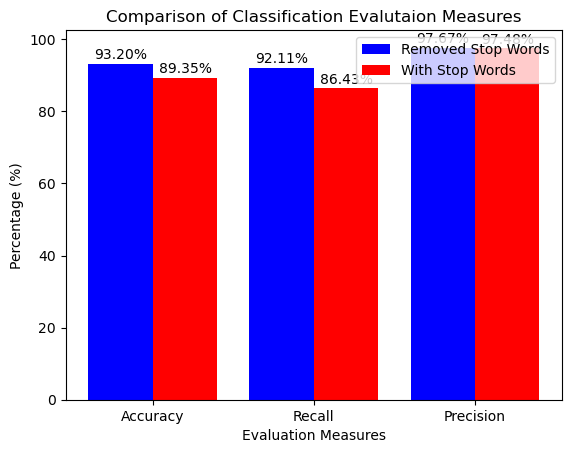

In [343]:
# Data for the accuracy, recall and precition with and without stop words
evaluation_measures = ['Accuracy', 'Recall', 'Precision']
without_stop_words = [89.35, 86.43, 97.48]  
with_stop_words = [93.20, 92.11, 97.67] 

bar_width = 0.4

# Set positions of bar on x axis
r1 = np.arange(len(evaluation_measures ))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, with_stop_words, color='blue', width=bar_width, label='Removed Stop Words')
plt.bar(r2, without_stop_words, color='red', width=bar_width, label='With Stop Words')

# Add labels and title
plt.xlabel('Evaluation Measures')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Classification Evalutaion Measures')
plt.xticks([r + bar_width / 2 for r in range(len(evaluation_measures))], evaluation_measures)

# Show the percentages on top of the bars
for i in range(len(evaluation_measures)):
    plt.text(r1[i], with_stop_words[i] + 0.5, f'{with_stop_words[i]:.2f}%', ha='center', va='bottom', color='black')
    plt.text(r2[i], without_stop_words[i] + 0.5, f'{without_stop_words[i]:.2f}%', ha='center', va='bottom', color='black')
    
# Adding the legend
plt.legend()

# Show the graph
plt.show()

To perform this, I modified and reran the code without the stop words. The PDF file containing the results is also included in the GitHub repository. According to the results, the accuracy of the model with stop words in the email is 89.35%, and its recall is 86.43%, while the precision is 97.48%. When we compare these metrics to the test set data with the stop words removed, we observe that the metrics are slightly higher in the latter case. Specifically, the accuracy without stop words is 93.20%, which is higher than the accuracy with stop words (89.35%). The recall without stop words is 92.11%, higher than the recall with stop words (86.43%). Additionally, the precision without stop words is 97.67%, also higher than the precision with stop words (97.48%). Overall the test set data with removed stop words are higher compare with the test set data with stop words in terms of those three evaluation measures.

2. Experiment on the number of words used for training. Filter the dictionary to
include only words occurring more than k times (1000 words, then k > 100, and k
= 50 times). For example, the word “offer” appears 150 times, that means that it
will be included in the dictionary.

In [420]:
# Function to filter words based on their counts 
def filter_words_2(word_count, k):
    return {word: count for word, count in word_count.items() if count > k}

# Function to create a feature matrix 
def create_feature_matrix_2(df, vocabulary):
    feature_matrix = np.zeros((len(df), len(vocabulary)), dtype=int)
    for index in range(len(df)):
        for word in str(df.iloc[index]['EmailMessages']).split():
            if word in vocabulary:
                feature_matrix[index][vocabulary.index(word)] = 1
    return feature_matrix

# Function for Laplace smoothing 
def laplace_smoothing_2(feature_matrix_spam, feature_matrix_ham):
    word_probabilities_spam = np.zeros(feature_matrix_spam.shape[1])
    word_probabilities_ham = np.zeros(feature_matrix_ham.shape[1])
    
    word_count_spam = np.sum(feature_matrix_spam, axis=0)
    word_count_ham = np.sum(feature_matrix_ham, axis=0)
    
    total_words_spam = np.sum(word_count_spam)
    total_words_ham = np.sum(word_count_ham)
    
    smoothing_param = 1
    num_classes = 2

    # Calculate the likelihood of each word with Laplace smoothing
    for i in range(len(word_probabilities_spam)):
        word_probabilities_spam[i] = (word_count_spam[i] + smoothing_param) / (total_words_spam + smoothing_param * num_classes)
        word_probabilities_ham[i] = (word_count_ham[i] + smoothing_param) / (total_words_ham + smoothing_param * num_classes)

    return word_probabilities_spam, word_probabilities_ham

# Function to classify an email
def classify_email_2(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary):
    """Classify an email as spam (1) or ham (0) based on calculated probabilities."""
    log_probability_ham = np.log(P_C_ham)
    log_probability_spam = np.log(P_C_spam)
    
    words = str(email).split()
    
    for word in words:
        if word in vocabulary:
            index = vocabulary.index(word)
            log_probability_ham += np.log(likelihood_ham[index])
            log_probability_spam += np.log(likelihood_spam[index])
    
    return 0 if log_probability_ham > log_probability_spam else 1

# Define k values for filtering
k_values_2 = [1000, 100, 50]
results_2 = {}

# Calculate word counts across the training set for filtering 
all_messages_2 = pd.concat([train_ham['EmailMessages'], train_spam['EmailMessages']])
all_words_2 = all_messages_2.str.cat(sep=' ').split()
word_counts_2 = Counter(all_words_2)

# Get the vocabulary from the most common words
most_common_words_2 = dict(word_counts_2.most_common(10000)) 

for k in k_values_2:
    filtered_words_2 = filter_words_2(most_common_words_2, k)
    vocabulary_2 = list(filtered_words_2.keys())  # Use the filtered vocabulary for feature matrices

    # Create feature matrices for spam and ham 
    feature_matrix_spam_2 = create_feature_matrix_2(train_spam, vocabulary_2)
    feature_matrix_ham_2 = create_feature_matrix_2(train_ham, vocabulary_2)

    # Calculate the likelihood of words using Laplace smoothing 
    likelihood_spam_2, likelihood_ham_2 = laplace_smoothing_2(feature_matrix_spam_2, feature_matrix_ham_2)

    # Classify the testing emails and store the results in a new column 'predicted' 
    test_set_2 = test_set.copy()
    test_set_2.loc[:, 'Predicted'] = test_set_2['EmailMessages'].apply(
        lambda email: classify_email_2(email, likelihood_ham_2, likelihood_spam_2, P_C_ham, P_C_spam, vocabulary_2)
    )

    # Extract the actual and predicted classifications 
    true_labels_2 = np.array(test_set_2['Classification'])
    predicted_labels_2 = np.array(test_set_2['Predicted'])

    # Defined FP, FN, TP, and TN 
    TP_2 = ((test_set_2['Classification'] == 1) & (test_set_2['Predicted'] == 1)).sum()
    TN_2 = ((test_set_2['Classification'] == 0) & (test_set_2['Predicted'] == 0)).sum()
    FP_2 = ((test_set_2['Classification'] == 0) & (test_set_2['Predicted'] == 1)).sum()
    FN_2 = ((test_set_2['Classification'] == 1) & (test_set_2['Predicted'] == 0)).sum()
    
    # Calculate Accuracy
    accuracy_2 = (TP_2 + TN_2) / (TP_2 + TN_2 + FP_2 + FN_2)
    
    # Calculate Recall
    recall_2 = TP_2 / (TP_2 + FN_2)
    
    # Calculate Precision
    precision_2 = TP_2 / (TP_2 + FP_2)

    # Store results for the current k 
    results_2[k] = {
        'Accuracy': accuracy_2 * 100,
        'Recall': recall_2 * 100,
        'Precision': precision_2 * 100
    }

# Create a DataFrame for the results
results_df_2 = pd.DataFrame.from_dict(results_2, orient='index')
results_df_2.index.name = 'k Value'
results_df_2.reset_index(inplace=True)

# Display results DataFrame
results_df_2


,k Value,Accuracy,Recall,Precision
0,1000,90.206997,92.590930,92.857786
1,100,93.069846,92.393354,97.184961
2,50,93.009321,92.079030,97.406422


Starting from 1000, I noticed that while the k is decreasing the accuracy and precision is increasing, while in recall, it doesnt compromise it while the accuracy and precision is improving.

3. Discuss the results of the different parameters used for Lambda smoothing. Test
it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate
performance metrics for each.

In [418]:
# Function for calculating probabilities with Laplace smoothing
def laplace_smoothing(feature_matrix_spam, feature_matrix_ham, vocabulary, smoothing_param):
    # Initialize the probability of each word given spam and ham
    num_words = len(vocabulary)
    word_probabilities_spam = np.zeros(num_words)
    word_probabilities_ham = np.zeros(num_words)
    
    # Count occurrences of words in spam and ham emails
    word_count_spam = np.sum(feature_matrix_spam, axis=0)
    word_count_ham = np.sum(feature_matrix_ham, axis=0)
    
    # Total number of words in spam and ham
    total_words_spam = np.sum(word_count_spam)
    total_words_ham = np.sum(word_count_ham)

    # Calculate likelihood for each word with Laplace smoothing using the smoothing_param
    for i in range(num_words):
        word_probabilities_spam[i] = (word_count_spam[i] + smoothing_param) / (total_words_spam + smoothing_param * len(vocabulary))
        word_probabilities_ham[i] = (word_count_ham[i] + smoothing_param) / (total_words_ham + smoothing_param * len(vocabulary))

    return word_probabilities_spam, word_probabilities_ham


# Function to classify an email based on the computed likelihoods
def classify_email(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary):
    log_probability_ham = np.log(P_C_ham)
    log_probability_spam = np.log(P_C_spam)
    
    words = str(email).split()
    
    for word in words:
        if word in vocabulary:
            index = vocabulary.index(word)
            log_probability_ham += np.log(likelihood_ham[index])
            log_probability_spam += np.log(likelihood_spam[index])
    
    return 1 if log_probability_spam > log_probability_ham else 0


# Define lambda values to test
lambda_values = [2.0, 1.0, 0.5, 0.1, 0.005]
results = []

# Testing loop for different λ values
for lambda_val in lambda_values:
    # Apply Laplace smoothing
    likelihood_spam, likelihood_ham = laplace_smoothing(feature_matrix_spam, feature_matrix_ham, vocabulary, lambda_val)

    # Classify the emails based on the likelihoods
    test_set['Prediction'] = test_set['EmailMessages'].apply(
        lambda email: classify_email(email, likelihood_ham, likelihood_spam, P_C_ham, P_C_spam, vocabulary)
    )
    
    # Compute performance metrics (accuracy, precision, recall)
    TP = ((test_set['Classification'] == 1) & (test_set['Prediction'] == 1)).sum()
    TN = ((test_set['Classification'] == 0) & (test_set['Prediction'] == 0)).sum()
    FP = ((test_set['Classification'] == 0) & (test_set['Prediction'] == 1)).sum()
    FN = ((test_set['Classification'] == 1) & (test_set['Prediction'] == 0)).sum()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) 
    precision = TP / (TP + FP) 

    results.append({
        'Lambda': lambda_val,
        'Accuracy': accuracy * 100,
        'Recall': recall * 100,
        'Precision': precision * 100
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\John Luis Magtoto\AppData\Local\Temp\ipykernel_25832\219696846.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Prediction'] = test_set['EmailMessages'].apply(


   Lambda   Accuracy     Recall  Precision
0   2.000  93.063794  92.186798  97.381653
1   1.000  93.033531  92.114953  97.407407
2   0.500  93.033531  92.096991  97.425423
3   0.100  93.160634  92.204760  97.511635
4   0.005  93.203002  92.231702  97.549392


Findings are approximate and rounded off.

λ = 2.0:

Accuracy: 93.06%
Recall: 92.19%
Precision: 97.38%

λ = 1.0:

Accuracy: 93.03%
Recall: 92.11%
Precision: 97.41%

λ = 0.5:

Accuracy: 93.03%
Recall: 92.10%
Precision: 97.43%

λ = 0.1:

Accuracy: 93.16%
Recall: 92.20%
Precision: 97.51%

λ = 0.005:

Accuracy: 93.20%
Recall: 92.23%
Precision: 97.55%

Based on the results, in terms of accuracy, the model consistently performs at around 93%, with slight differences as the lambda decreases. As lambda decreases, accuracy improves. The same applies to recall and precision, which consistently perform at around 92% and 97%, respectively. As lambda decreases, both recall and precision also improve slightly. This indicates that any of the lambda values can still perform well in reducing false positives and identifying ham or spam email messages. Overall, smaller lambda values perform better in terms of accuracy, recall, and precision, while larger lambda values perform only slightly worse compared to the smaller ones.

4. What are your recommendations to further improve the model?

To improve the model, I think it is better to also removed the other unneccessary words asside from the words that has been removed that came from the stop_words text file. Those unneccessary words are html tags such as tr, td, etc.. At first I tried to removed those html tags just to see the difference between those three evaluation measures and in accuracy, it has 93.38%, which is higher than the accuracy with html tags (93.20%). The recall without stop words is 92.21%, higher than the recall with html tags (92.11%). Additionally, the precision without stop words is 97.84%, also higher than the precision with html tags (97.67%). Therefore, I recommend to removed the html tags to improve the model. Another problem that I would like to point out is it takes too long to run the model and I think its because it has a problem on the way the email messages has been encoded. To run it efficiently, I would like to improve the encoding part.